In [79]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import warnings # to silence convergence warnings
import scipy.linalg as lng 
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default
from sklearn.preprocessing import StandardScaler

# Data preprocessing - deviding x dataset to 100 and rest 1000 and drop columns of which name is 'Unnamed: 0'

In [80]:
y = pd.read_csv('../dataset/y.csv')
x_num_100 = pd.read_csv('../dataset/x_numerical.csv')
x_cat_100 = pd.read_csv('../dataset/x_cat.csv')
x_new_num = pd.read_csv('../dataset/x_new_numerical.csv')
x_new_cat = pd.read_csv('../dataset/x_new_cat.csv')

In [81]:
x_100 = pd.concat([x_num_100,x_cat_100],axis=1)
x_100

,Unnamed: 0,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,x_92,x_93,x_94,x_95,Unnamed: 0,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,12.826477,-6.889479,3.443535,5.400120,0,I,I,H,J,K
1,1,-6.370690,7.792366,11.858663,-10.143062,-15.420530,21.683970,1.057192,2.559764,-0.001413,...,10.039281,-7.678936,-0.189822,0.717526,1,H,I,H,I,I
2,2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,16.342276,2.484515,-1.356242,1.852533,...,14.186614,-9.527944,0.400832,-2.458897,2,G,I,K,J,G
3,3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,16.342276,-0.442587,0.743039,-0.376102,...,8.871258,-7.514400,-3.448892,-2.612379,3,K,H,I,I,H
4,4,-13.066517,4.812794,10.641948,-17.691825,-10.397767,19.057921,1.900578,6.133609,-0.771247,...,10.532577,-7.509476,-0.003119,0.754905,4,H,H,K,J,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-3.746623,-0.265494,14.898749,-17.262103,-15.406944,25.744304,4.157661,6.127105,2.839280,...,17.348757,-6.059881,4.196626,1.168894,95,H,I,G,I,H
96,96,-4.311540,7.208115,10.171101,-17.232457,-11.173426,24.660276,-0.108392,8.513152,4.327020,...,17.345148,-3.650362,3.535945,-0.011575,96,H,I,I,J,K
97,97,-15.662503,0.521416,7.628422,-18.867588,-20.632873,20.905762,-3.530738,0.965488,-0.001413,...,7.651474,-1.268347,-4.384652,-1.665588,97,G,H,I,G,K
98,98,-7.338365,1.597154,12.151154,-10.143062,-10.397767,23.185303,3.751106,6.357028,5.208797,...,11.647115,-4.830073,-2.378979,-3.120303,98,G,I,I,H,H


In [82]:
y = y.drop(columns={'Unnamed: 0'})
# y

In [83]:
x_new = pd.concat([x_new_num,x_new_cat],axis=1)
x_new

,Unnamed: 0,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,x_92,x_93,x_94,x_95,Unnamed: 0,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,0,-6.493200,4.857913,12.334877,-17.075041,-10.005906,14.545844,5.339252,-0.000574,-0.275014,...,14.086256,-0.133124,3.391461,2.102585,0,G,I,G,J,G
1,1,-6.688701,6.402298,13.321841,-14.890575,-15.208925,22.978112,-3.424436,2.773030,1.326065,...,11.477398,-10.509565,-0.347968,-2.471949,1,I,I,J,K,H
2,2,-8.507726,1.639164,10.008101,-19.167274,-15.745444,20.336708,-0.015468,-0.000574,2.756582,...,10.006645,-6.555100,-3.588808,-2.342992,2,H,H,J,H,K
3,3,-12.841493,-0.006051,11.307615,-22.689726,-17.290155,20.984080,-1.775278,2.554297,0.315108,...,12.257391,-8.267102,-1.373772,-5.374916,3,G,H,K,K,J
4,4,-8.555160,-0.006051,13.122784,-12.977789,-14.144455,24.086075,6.270027,2.181681,6.731993,...,8.004617,-10.170813,2.445537,-0.008240,4,H,I,J,H,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,-8.501994,7.364637,14.598509,-20.284036,-16.604685,20.682107,-0.015468,3.956915,-1.673680,...,14.119678,-6.228438,-0.419140,-4.737494,995,H,I,H,I,G
996,996,-7.835061,5.410653,10.008101,-18.169995,-15.071277,23.569444,2.922559,5.423952,-0.019162,...,10.006645,-8.891943,0.617816,-0.008240,996,J,I,J,G,G
997,997,-7.547603,-0.006051,10.008101,-10.250633,-14.997699,22.129570,4.148231,1.814772,1.798028,...,13.666244,-9.850952,-2.478082,1.597624,997,H,H,H,H,J
998,998,-10.989069,3.416966,10.008101,-17.205503,-10.092004,21.299033,2.201629,3.492949,-0.019162,...,12.634788,-5.447805,-0.529636,1.834458,998,H,I,G,G,G


In [84]:
x_100 = x_100.drop(columns={'Unnamed: 0'})
x_new = x_new.drop(columns={'Unnamed: 0'})

In [85]:
# As mentioned in the case_01_preprocessing.ipynb file,
# nan was the most frequent value in the first column, so we are going to
# drop all the rows of which nan is still located
x_new = x_new.dropna(axis=0)
x_new

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,x_91,x_92,x_93,x_94,x_95,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,-6.493200,4.857913,12.334877,-17.075041,-10.005906,14.545844,5.339252,-0.000574,-0.275014,-0.023505,...,6.983981,14.086256,-0.133124,3.391461,2.102585,G,I,G,J,G
1,-6.688701,6.402298,13.321841,-14.890575,-15.208925,22.978112,-3.424436,2.773030,1.326065,-2.664610,...,5.799896,11.477398,-10.509565,-0.347968,-2.471949,I,I,J,K,H
2,-8.507726,1.639164,10.008101,-19.167274,-15.745444,20.336708,-0.015468,-0.000574,2.756582,-6.619169,...,9.498865,10.006645,-6.555100,-3.588808,-2.342992,H,H,J,H,K
3,-12.841493,-0.006051,11.307615,-22.689726,-17.290155,20.984080,-1.775278,2.554297,0.315108,-4.498758,...,8.428060,12.257391,-8.267102,-1.373772,-5.374916,G,H,K,K,J
4,-8.555160,-0.006051,13.122784,-12.977789,-14.144455,24.086075,6.270027,2.181681,6.731993,-0.023505,...,11.065901,8.004617,-10.170813,2.445537,-0.008240,H,I,J,H,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-8.501994,7.364637,14.598509,-20.284036,-16.604685,20.682107,-0.015468,3.956915,-1.673680,-5.303247,...,8.286523,14.119678,-6.228438,-0.419140,-4.737494,H,I,H,I,G
996,-7.835061,5.410653,10.008101,-18.169995,-15.071277,23.569444,2.922559,5.423952,-0.019162,-0.561963,...,8.773873,10.006645,-8.891943,0.617816,-0.008240,J,I,J,G,G
997,-7.547603,-0.006051,10.008101,-10.250633,-14.997699,22.129570,4.148231,1.814772,1.798028,-4.611600,...,-0.489275,13.666244,-9.850952,-2.478082,1.597624,H,H,H,H,J
998,-10.989069,3.416966,10.008101,-17.205503,-10.092004,21.299033,2.201629,3.492949,-0.019162,-4.334677,...,12.008307,12.634788,-5.447805,-0.529636,1.834458,H,I,G,G,G


## Changing categorical variables to dummy values
### Each row's values has been checked through Excel
### C_1 -> G, H, I, J, K 
### C_2 -> H, I
### C_3 -> G, H, I, J, K
### C_4 -> G, H, I, J, K
### C_5 -> G, H, I, J, K
#### -> So, 22 columns for catergorical variables have been created through pd.get_dummies
##### The number of numerical variables -> 95 (x1~x95)
##### -> 117 columns

In [86]:
x_100 = pd.get_dummies(x_100)
x_100

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,-0.295280,...,0,0,0,1,0,0,0,0,0,1
1,-6.370690,7.792366,11.858663,-10.143062,-15.420530,21.683970,1.057192,2.559764,-0.001413,-4.286417,...,0,0,1,0,0,0,0,1,0,0
2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,16.342276,2.484515,-1.356242,1.852533,-0.295280,...,0,0,0,1,0,1,0,0,0,0
3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,16.342276,-0.442587,0.743039,-0.376102,-7.535363,...,0,0,1,0,0,0,1,0,0,0
4,-13.066517,4.812794,10.641948,-17.691825,-10.397767,19.057921,1.900578,6.133609,-0.771247,-0.295280,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.746623,-0.265494,14.898749,-17.262103,-15.406944,25.744304,4.157661,6.127105,2.839280,-3.862928,...,0,0,1,0,0,0,1,0,0,0
96,-4.311540,7.208115,10.171101,-17.232457,-11.173426,24.660276,-0.108392,8.513152,4.327020,1.556960,...,0,0,0,1,0,0,0,0,0,1
97,-15.662503,0.521416,7.628422,-18.867588,-20.632873,20.905762,-3.530738,0.965488,-0.001413,-12.522048,...,1,0,0,0,0,0,0,0,0,1
98,-7.338365,1.597154,12.151154,-10.143062,-10.397767,23.185303,3.751106,6.357028,5.208797,-0.295280,...,0,1,0,0,0,0,1,0,0,0


In [87]:
x_new = pd.get_dummies(x_new)
x_new = x_new.reset_index(drop=True)
x_new

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-6.493200,4.857913,12.334877,-17.075041,-10.005906,14.545844,5.339252,-0.000574,-0.275014,-0.023505,...,0,0,0,1,0,1,0,0,0,0
1,-6.688701,6.402298,13.321841,-14.890575,-15.208925,22.978112,-3.424436,2.773030,1.326065,-2.664610,...,0,0,0,0,1,0,1,0,0,0
2,-8.507726,1.639164,10.008101,-19.167274,-15.745444,20.336708,-0.015468,-0.000574,2.756582,-6.619169,...,0,1,0,0,0,0,0,0,0,1
3,-12.841493,-0.006051,11.307615,-22.689726,-17.290155,20.984080,-1.775278,2.554297,0.315108,-4.498758,...,0,0,0,0,1,0,0,0,1,0
4,-8.555160,-0.006051,13.122784,-12.977789,-14.144455,24.086075,6.270027,2.181681,6.731993,-0.023505,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,-8.501994,7.364637,14.598509,-20.284036,-16.604685,20.682107,-0.015468,3.956915,-1.673680,-5.303247,...,0,0,1,0,0,1,0,0,0,0
829,-7.835061,5.410653,10.008101,-18.169995,-15.071277,23.569444,2.922559,5.423952,-0.019162,-0.561963,...,1,0,0,0,0,1,0,0,0,0
830,-7.547603,-0.006051,10.008101,-10.250633,-14.997699,22.129570,4.148231,1.814772,1.798028,-4.611600,...,0,1,0,0,0,0,0,0,1,0
831,-10.989069,3.416966,10.008101,-17.205503,-10.092004,21.299033,2.201629,3.492949,-0.019162,-4.334677,...,1,0,0,0,0,1,0,0,0,0


## Normalisation for numerical dataset

In [88]:
# y
# x_num_100
# x_new_num
scaler = StandardScaler()

In [89]:
x_100[x_100.columns[:95]]

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95
0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,-0.295280,...,-2.590210,-1.943897,3.011972,-31.614019,-3.990017,3.692902,12.826477,-6.889479,3.443535,5.400120
1,-6.370690,7.792366,11.858663,-10.143062,-15.420530,21.683970,1.057192,2.559764,-0.001413,-4.286417,...,-3.573072,-1.583166,-0.489808,-28.880360,-6.552140,7.270303,10.039281,-7.678936,-0.189822,0.717526
2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,16.342276,2.484515,-1.356242,1.852533,-0.295280,...,-4.023667,2.648645,4.067629,-32.769482,-5.438118,5.889789,14.186614,-9.527944,0.400832,-2.458897
3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,16.342276,-0.442587,0.743039,-0.376102,-7.535363,...,-4.987491,3.992532,3.954274,-35.846878,-10.208559,7.024105,8.871258,-7.514400,-3.448892,-2.612379
4,-13.066517,4.812794,10.641948,-17.691825,-10.397767,19.057921,1.900578,6.133609,-0.771247,-0.295280,...,-4.021144,3.152862,3.366474,-24.734686,-3.632849,8.186575,10.532577,-7.509476,-0.003119,0.754905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.746623,-0.265494,14.898749,-17.262103,-15.406944,25.744304,4.157661,6.127105,2.839280,-3.862928,...,-2.473629,3.219622,7.296911,-31.600305,-1.008369,-0.026005,17.348757,-6.059881,4.196626,1.168894
96,-4.311540,7.208115,10.171101,-17.232457,-11.173426,24.660276,-0.108392,8.513152,4.327020,1.556960,...,1.541280,6.440714,4.503169,-29.506432,-6.276006,9.753088,17.345148,-3.650362,3.535945,-0.011575
97,-15.662503,0.521416,7.628422,-18.867588,-20.632873,20.905762,-3.530738,0.965488,-0.001413,-12.522048,...,-11.148246,-0.005782,-2.396112,-39.440232,-8.566806,-0.300405,7.651474,-1.268347,-4.384652,-1.665588
98,-7.338365,1.597154,12.151154,-10.143062,-10.397767,23.185303,3.751106,6.357028,5.208797,-0.295280,...,-6.120490,-0.005782,0.672467,-33.044920,-5.693242,6.465018,11.647115,-4.830073,-2.378979,-3.120303


In [90]:
x_100_num = x_100[x_100.columns[:95]]
x_new_num = x_new[x_new.columns[:95]]

In [91]:
y_norm = scaler.fit_transform(y)
x_100_norm = scaler.fit_transform(x_100_num)
x_new_norm = scaler.fit_transform(x_new_num)

In [92]:
Y = pd.DataFrame(y_norm, columns=y.columns)
x_100_norm = pd.DataFrame(x_100_norm,columns=x_100_num.columns)
x_new_norm = pd.DataFrame(x_new_norm, columns=x_new_num.columns)

In [93]:
X_100 = pd.concat([x_100_norm,x_100[x_100.columns[95:]]],axis=1)
X_100

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-0.066632,0.231317,-0.166153,-0.809475,2.231355,0.438019,-0.464164,-0.463401,0.558215,0.970608,...,0,0,0,1,0,0,0,0,0,1
1,0.248196,0.973238,-0.148022,1.919582,-0.474826,-0.148653,-0.461827,-0.639890,-0.742726,-0.289984,...,0,0,1,0,0,0,0,1,0,0
2,0.835650,-0.604216,0.072754,-0.348421,0.309674,-1.601266,0.015640,-1.846711,-0.195179,0.970608,...,0,0,0,1,0,1,0,0,0,0
3,-0.881205,-1.009971,-1.105614,-1.490715,-1.893380,-1.601266,-0.963531,-1.199762,-0.853387,-1.316156,...,0,0,1,0,0,0,1,0,0,0
4,-1.588920,0.039977,-0.604728,-0.386520,1.142895,-0.862777,-0.179698,0.461485,-0.970090,0.970608,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.968154,-1.550645,0.993104,-0.255242,-0.470450,0.955508,0.575339,0.459481,0.096248,-0.156226,...,0,0,1,0,0,0,1,0,0,0
96,0.813159,0.790239,-0.781465,-0.246185,0.893072,0.660719,-0.851736,1.194805,0.535639,1.555633,...,0,0,0,1,0,0,0,0,0,1
97,-2.301174,-1.304169,-1.735885,-0.745708,-2.153606,-0.360278,-1.996576,-1.131209,-0.742726,-2.891190,...,1,0,0,0,0,0,0,0,0,1
98,-0.017302,-0.967226,-0.038233,1.919582,1.142895,0.259617,0.439338,0.530338,0.796064,0.970608,...,0,1,0,0,0,0,1,0,0,0


In [94]:
X_new = pd.concat([x_new_norm,x_new[x_new.columns[95:]]],axis=1)
X_new

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,0.570855,0.050110,0.008965,-0.247135,1.205200,-1.838366,1.027815,-1.436622,-0.949061,1.106782,...,0,0,0,1,0,1,0,0,0,0
1,0.500914,0.509559,0.364977,0.368725,-0.493157,0.150094,-2.015318,-0.521121,-0.404259,0.217644,...,0,0,0,0,1,0,1,0,0,0
2,-0.149855,-0.907456,-0.830336,-0.836993,-0.668286,-0.472790,-0.831576,-1.436622,0.082505,-1.113674,...,0,1,0,0,0,0,0,0,0,1
3,-1.700291,-1.396902,-0.361583,-1.830067,-1.172506,-0.320129,-1.442659,-0.593320,-0.748259,-0.399829,...,0,0,0,0,1,0,0,0,1,0
4,-0.166825,-1.396902,0.293174,0.907991,-0.145695,0.411369,1.351021,-0.716312,1.435225,1.106782,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,-0.147805,0.795851,0.825489,-1.151838,-0.948757,-0.391339,-0.831576,-0.130349,-1.424987,-0.670664,...,0,0,1,0,0,1,0,0,0,0
829,0.090795,0.214548,-0.830336,-0.555833,-0.448226,0.289540,0.188634,0.353885,-0.862002,0.925508,...,1,0,0,0,0,1,0,0,0,0
830,0.193635,-1.396902,-0.830336,1.676850,-0.424209,-0.050005,0.614241,-0.837420,-0.243663,-0.437818,...,0,1,0,0,0,0,0,0,1,0
831,-1.037574,-0.378567,-0.830336,-0.283916,1.177096,-0.245859,-0.061704,-0.283493,-0.862002,-0.344591,...,1,0,0,0,0,1,0,0,0,0


In [17]:
# Y
# X_100
# X_new

# Deviding x_100 into train, validation and test sets
### Ratio -> train:validation:test = 2:1:1 -> 50:25:25

In [25]:
# # scaled dataset in numpy array
# # y_np_
# # x_num_100_np_
# x_num_100_np_.shape, y_np_.shape

((100, 95), (100, 1))

In [29]:
# x_100_train_np = x_num_100_np_[:50]
# x_100_val_np = x_num_100_np_[50:75]
# x_100_test_np = x_num_100_np_[75:]

# y_train_np = y_np_[:50]
# y_val_np = y_np_[50:75]
# y_test_np = y_np_[75:]

# x_100_train_np.shape, x_100_val_np.shape, x_100_test_np.shape, y_train_np.shape, y_val_np.shape, y_test_np.shape

((50, 95), (25, 95), (25, 95), (50, 1), (25, 1), (25, 1))

# RMSE

In [22]:
def RMSE(y,y_pred):
    term = np.sum(np.power((y-y_pred),2))
    mean = np.mean(term)
    return np.sqrt(mean)

# OLS

In [23]:
# # y_np_
# # x_num_100_np_
 
# def ols_analytical(X, y):
#     inner_product = np.linalg.inv(X.T @ X)
#     outer_product = X.T @ y
#     betas = inner_product @ outer_product
#     return betas

# betas = ols_analytical(x_num_100_np_,y_np_)

In [24]:
# betas.shape

(95, 1)

In [30]:
# result_train = x_100_train_np @ betas
# result_val = x_100_val_np @ betas
# result_test = x_100_test_np @ betas

In [32]:
# train_rmse = RMSE(y_train_np,result_train)
# val_rmse = RMSE(y_val_np, result_val)
# test_rmse = RMSE(y_test_np,result_test)

In [33]:
# train_rmse, val_rmse, test_rmse

(0.4232666972803526, 0.36632031616303734, 0.3784781660003656)

In [34]:
# overall_rmse = RMSE(y_np_, x_num_100_np_@betas)
# overall_rmse

0.6757151716510481

# Ridge regression

# KNN regression

# Decision Tree Regression

In [98]:
# Y
# X_100
# X_new

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_100,Y)

DecisionTreeRegressor()

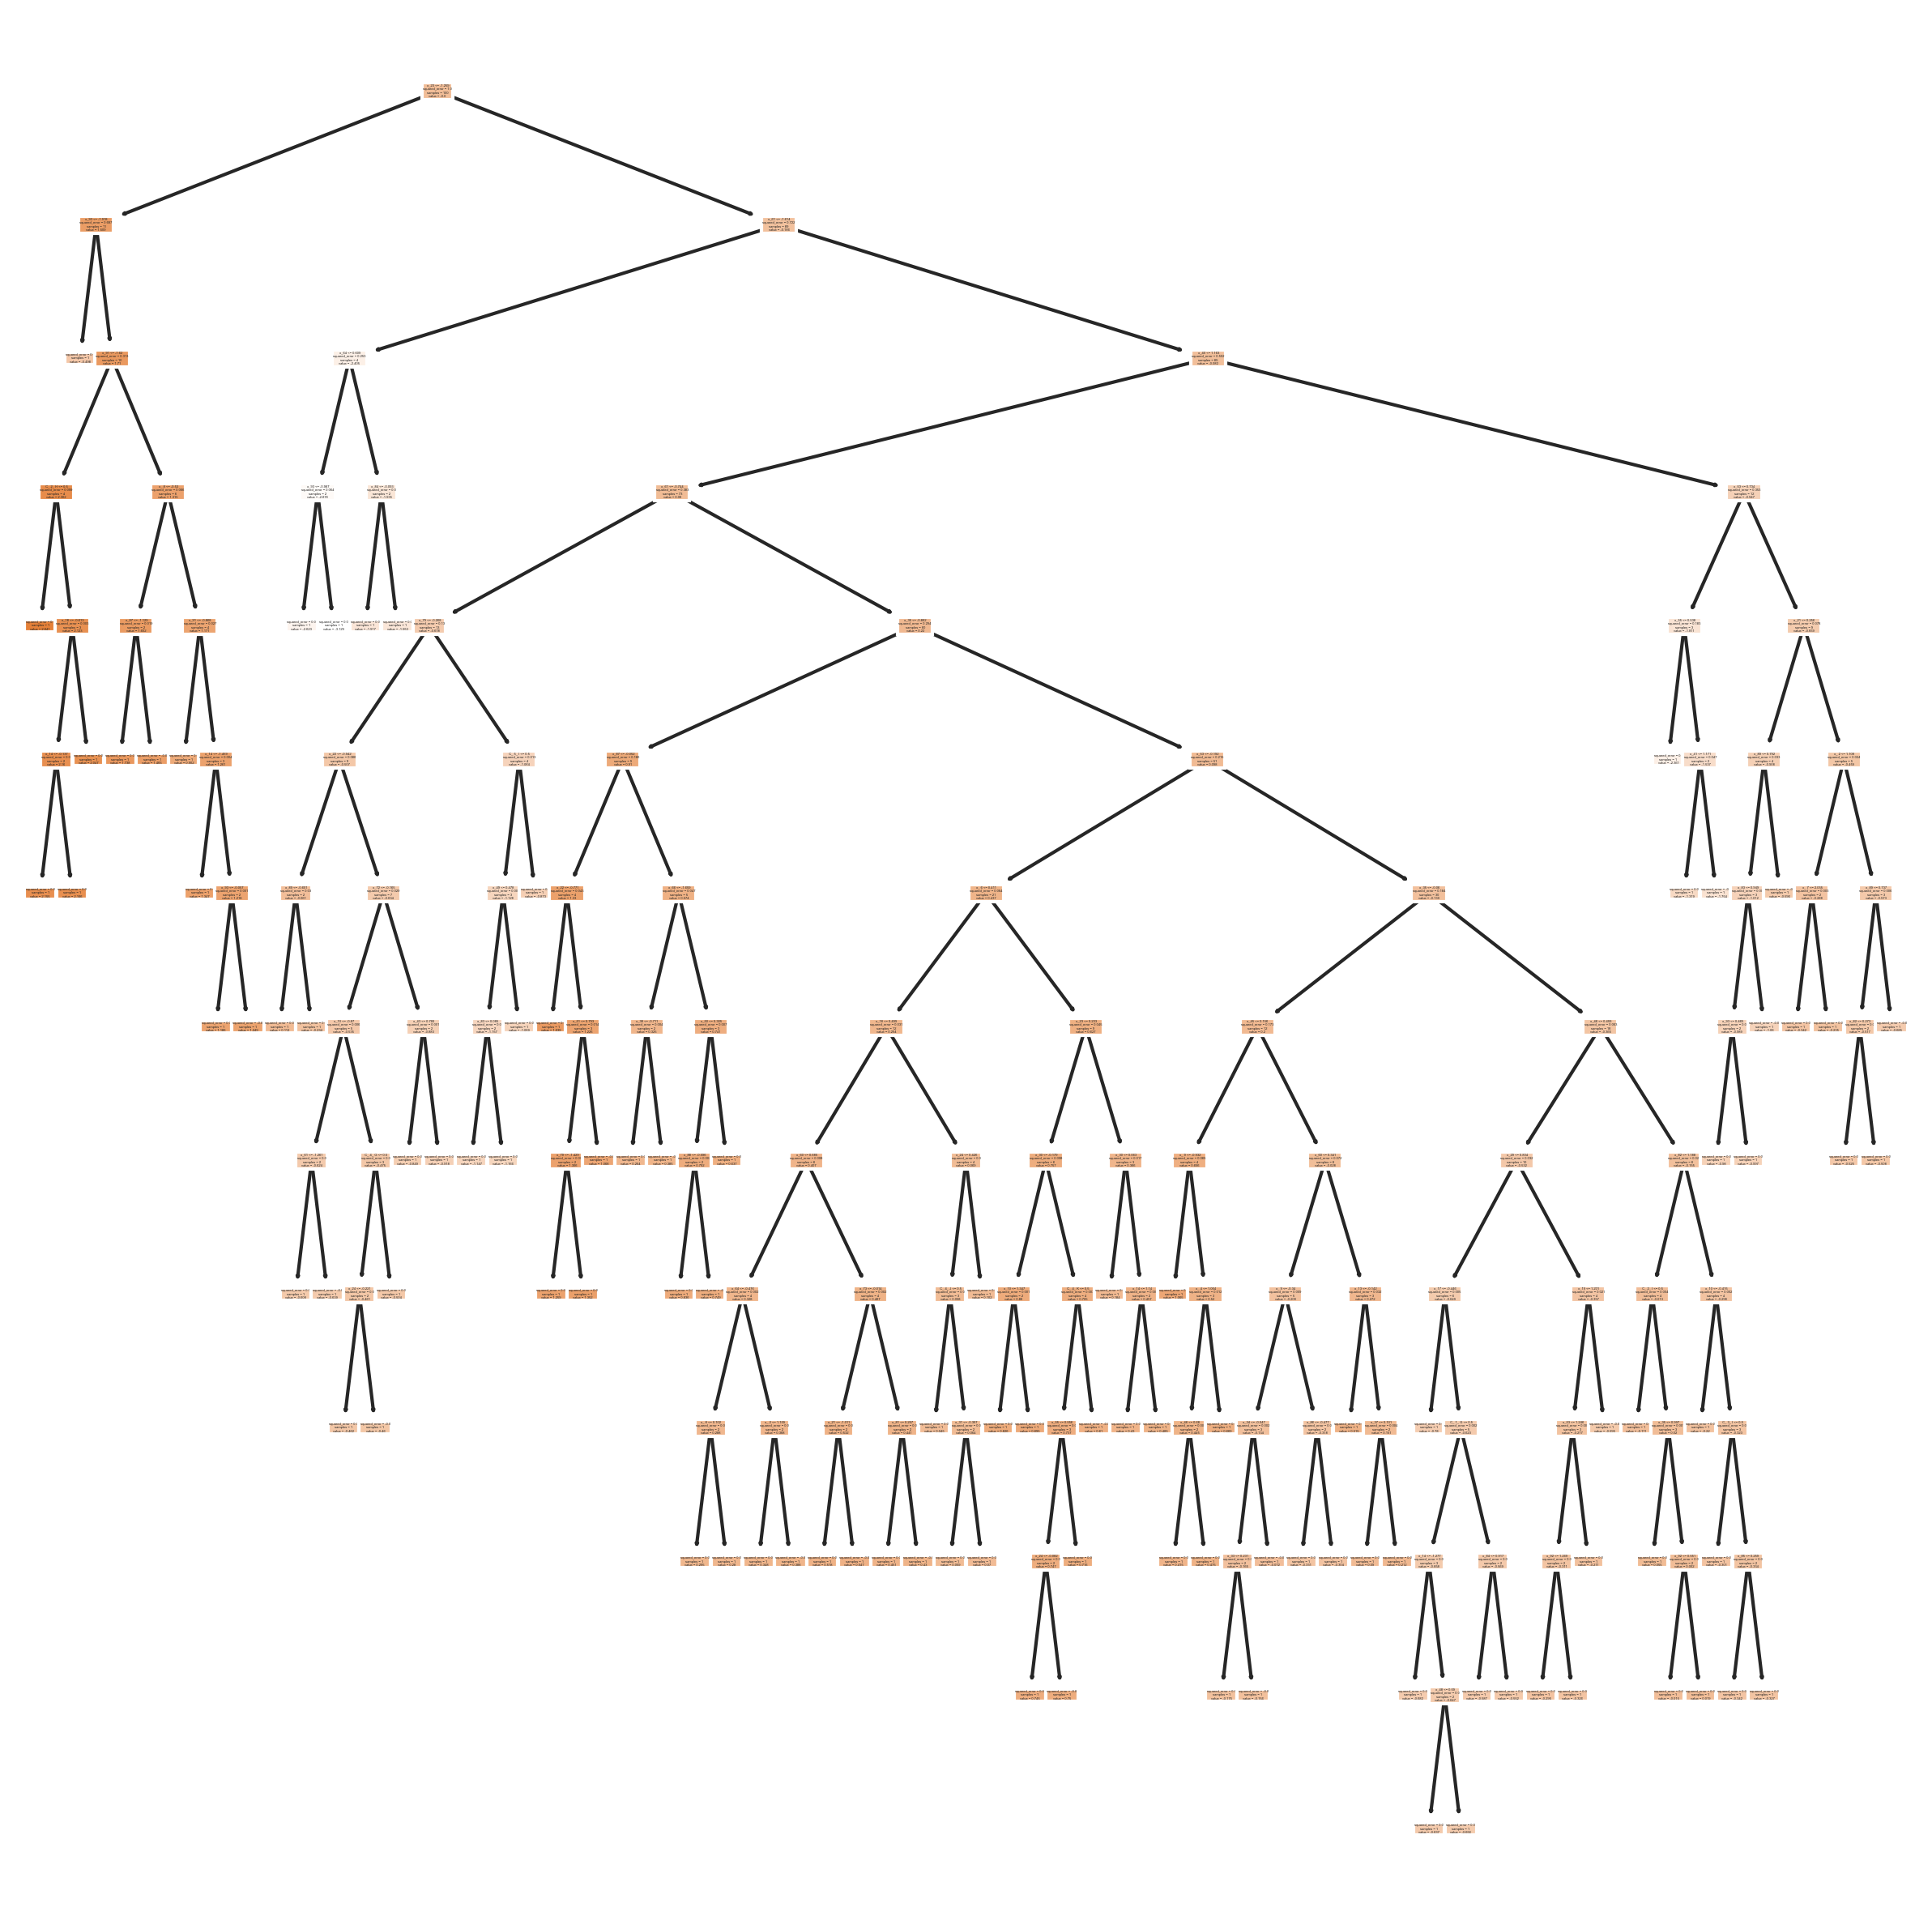

In [99]:
feature_names = X_100.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dtree,
               feature_names = feature_names,
               filled = True);

In [100]:
from sklearn.model_selection import GridSearchCV